#### Gradient Descent   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [4]:
array = pd.read_csv("../Data/pizzaSale.csv").values
X = array[:,0]
Y = array[:,1]

##### Plot the loss on a dataset with a single input variable.   


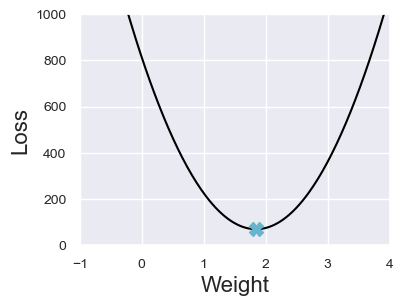

In [5]:
def predict(X, w, b):
    return X * w + b

def loss(X, Y, w, b):
    return np.average((predict(X, w, b) - Y) ** 2)

# Compute losses for w ranging from -1 to 4
weights = np.linspace(-1.0, 4.0, 200)
losses = [loss(X, Y, w, 0) for w in weights]

plt.figure(figsize=(4,3))
# Plot weights and losses
plt.axis([-1, 4, 0, 1000])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Weight", fontsize=16)
plt.ylabel("Loss", fontsize=16)
plt.plot(weights, losses, color="black")

# Put a cyan cross on the minimum loss
min_index = np.argmin(losses)
plt.plot(weights[min_index], losses[min_index], "cX", markersize=10);

#### Gradient Discent (GD)   
If bias $b$ = 0, the only variable in the loss function is weight $w$   
If weight $w$ = 0, the only variable in the loss function is bias $b$   

Loss (MSE)  $L = \frac{\sum((wx_i + b) - y_i)^2}{N} = \frac{\sum(\hat{y} - y)^2}{N}$

Parital derivative of loss function is similar to loss function.   
Split a two variable problem to two one variable problems.   

For weight:   
- Each element of the sum is multiplied by $x$,    
- the error is not squared,        
- and the result is multiplied by 2   
    if $f(x) = x^2$, the derivative using the Power Rule: $f'(x) = 2x$   

$$\frac{\delta{y}}{\delta{w}} = 2.\frac{\sum x_i((wx_i + b) - y_i)}{N}$$

For bias:   
- elements of the sum are **not** multiplied by any value,    
- the error is not squared,        
- and the result is multiplied by 2 


$$\frac{\delta{y}}{\delta{b}} = 2.\frac{\sum ((wx_i + b) - y_i)}{N}$$


##### Gradient descent without bias    
works with one input-variable    

In [6]:
def gradient_(X, Y, w):
    return 2 * np.average(X * (predict(X, w, 0) - Y))

#### GD without bias   

In [8]:
def train_w(X, Y, iterations, lr):
    data = [] # gather result of each iteration to visualise later  
    
    w, b = 0, 0
    for i in range(iterations):
        # print("Iteration %4d => Loss: %.10f" % (i, loss(X, Y, w, 0)))
        current_loss = loss(X, Y, w, b)
        data.append(([i, w, 0, current_loss]))
        w -= gradient_(X, Y, w) * lr
    return w, b, pd.DataFrame(data, columns=['Epoch', 'Weight', 'Bias', 'Loss'])

In [9]:

# w, b, df  = train(X, Y, iterations=1000, lr=0.001)
w, b, df_w = train_w(X, Y, iterations=25, lr=0.001)
print(f"Weight {w}")

Weight 1.843691830708558


In [10]:
df_w

,Epoch,Weight,Bias,Loss
0,0,0.000000,0,812.866667
1,1,0.806800,0,304.363088
2,2,1.260544,0,143.526579
3,3,1.515730,0,92.654995
4,4,1.659247,0,76.564630
5,5,1.739960,0,71.475348
6,6,1.785354,0,69.865640
7,7,1.810883,0,69.356500
8,8,1.825241,0,69.195462
9,9,1.833315,0,69.144526


#### Observe   
In the dataframe, no change in loss after 20 iterations!  
The plot below shows the line for $\hat{y}$ with a bias.    

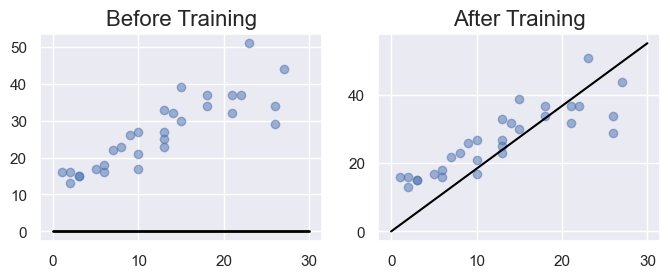

In [11]:
plt.figure(figsize=(8,3))
X_ = np.linspace(0,30, 10)

plt.subplot(1,2,1)
plt.title("Before Training",fontsize=16)
plt.scatter(X,Y, alpha=0.5)
plt.plot(X_,predict(X_, df_w.iloc[0].Weight, df_w.iloc[0].Bias), color='black', linewidth=2)

plt.subplot(1,2,2)
plt.title("After Training",fontsize=16)
plt.scatter(X,Y, alpha=0.5)
plt.plot(X_,predict(X_, df_w.iloc[-1].Weight, df_w.iloc[0].Bias), color='black') #, linewidth=2)

plt.subplots_adjust(top=0.8);

#### Redefine `gradient()` to return gradients for weight and bias    

In [12]:
def gradient(X, Y, w, b):
    w_gradient =  2 * np.average(X * (predict(X, w, b) - Y))
    b_gradient =  2 * np.average(predict(X, w, b) - Y)
    return(w_gradient, b_gradient) 
    

#### redefine train method   

In [13]:
def train(X, Y, iterations, lr):
    data = []
    w = b = 0
    for i in range(iterations):
        current_loss = loss(X, Y, w, b)
        data.append(([i, w, b, current_loss]))
        w_gradient, b_gradient = gradient(X, Y, w, b)
        w -= w_gradient * lr
        b -= b_gradient * lr
    return w, b, pd.DataFrame(data, columns=['Epoch', 'Weight', 'Bias', 'Loss'])

In [14]:
w, b, df_  = train(X, Y, iterations=10000, lr=0.001)
print(f"Weight {w}; Bias {b}")

Weight 1.0848258524488616; Bias 13.108507160092502


In [15]:
df_.tail()

,Epoch,Weight,Bias,Loss
9995,9995,1.084836,13.108337,22.843838
9996,9996,1.084834,13.108371,22.843836
9997,9997,1.084832,13.108405,22.843835
9998,9998,1.084830,13.108439,22.843834
9999,9999,1.084828,13.108473,22.843833


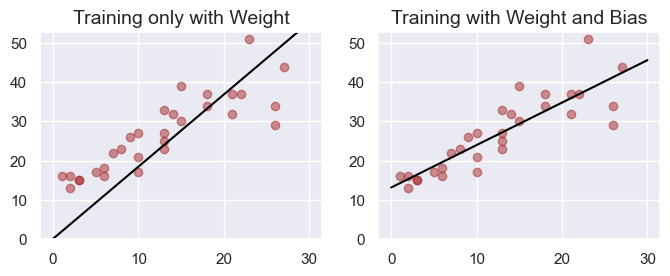

In [16]:
plt.figure(figsize=(8,3))
X_ = np.linspace(0,30, 10)

plt.subplot(1,2,1)
plt.title("Training only with Weight",fontsize=14)
plt.scatter(X,Y, color= 'brown', alpha=0.5)
plt.ylim(0)

plt.plot(X_,predict(X_, df_w.iloc[-1].Weight, df_w.iloc[0].Bias), color='black')

plt.subplot(1,2,2)
plt.title("Training with Weight and Bias",fontsize=14)
plt.scatter(X,Y, color= 'brown', alpha=0.5)
plt.ylim(0)
plt.plot(X_,predict(X_, df_.iloc[-1].Weight, df_.iloc[-1].Bias), color='black') 

plt.subplots_adjust(top=0.8);

#### Effect of training only with bias  

In [17]:
def train_b(X, Y, iterations, lr):
    data = []
    w = b = 0
    for i in range(iterations):
        current_loss = loss(X, Y, w, b)
        data.append(([i, w, b, current_loss]))
        w_gradient, b_gradient = gradient(X, Y, w, b)
        w -= w_gradient * lr
        b -= b_gradient * lr
    return w, b, pd.DataFrame(data, columns=['Epoch', 'Weight', 'Bias', 'Loss'])

In [18]:
w, b, df_b  = train_b(X, Y, iterations=10000, lr=0.001)
print(f"Weight {w}; Bias {b}")

Weight 1.0848258524488616; Bias 13.108507160092502


#### Compare the three training results   

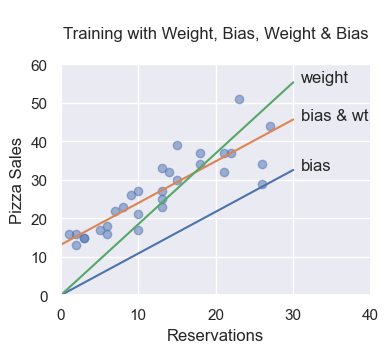

In [19]:
plt.figure(figsize=(4,3))
X_ = np.linspace(0,30, 10)

plt.title("\nTraining with Weight, Bias, Weight & Bias\n",fontsize=12)
plt.scatter(X,Y,  alpha=0.5)
plt.ylim(0,60)
plt.xlim(0,40)
plt.ylabel("Pizza Sales")
plt.xlabel("Reservations")

p1 = predict(X_, df_b.iloc[-1].Weight, df_b.iloc[0].Bias)
p2 = predict(X_, df_.iloc[-1].Weight, df_.iloc[-1].Bias)
p3 = predict(X_, df_w.iloc[-1].Weight, df_w.iloc[0].Bias)
p_val = list(zip([p1, p2, p3], ['bias', 'bias & wt', 'weight'])) 

for prediction in p_val: 
    plt.plot(X_, prediction[0])
    plt.text(X_[-1] + 1, prediction[0][-1], prediction[1]) 